<font color='tomato'><font color="#CC3D3D"><p>
# 실습#1. Regression with scikit-learn

#### 자주 사용하는 사이킷런 모듈
- 데이터 정제(Data Cleasing) & 속성 공학(Feature Engineering)
    - sklearn.preprocessing: 데이터 전처리(인코딩, 정규화 등)
    - sklearn.feature_selection: 속성선택
    - sklearn.feature_extraction: 속성추출(이미지나 텍스트에서 속성 추출)
- 모형 성능 평가와 개선
    - sklearn.model_selection: 데이터 분리, 검증 및 파라미터 튜닝(GridSearch 등)
    - sklearn.metrics: 성능평가(Recall, Precision, AUC 등)
- 지도학습(Supervised Learning) 알고리즘
    - sklearn.ensemble: 앙상블 알고리즘(RF, AdaBoost 등)
    - sklearn.linear_model: 선형모델(선형회귀, 로지스틱회귀 등) 
    - sklearn.svm: Support Vector Machines (SVM)
    - sklearn.tree: 의사결정나무(Decision Trees)
- 비지도학습(Unsupervised Learning) 알고리즘
    - sklearn.cluster: 군집분석(K-means, DBSCAN 등)
    - sklearn.decomposition: 차원축소(PCA, SVD 등)
- 유틸리티와 데이터 세트 
    - sklearn.pipeline: 워크플로우 효율화
    - sklearn.datasets: 예제 데이터 세트(iris, digits 데이터 등) 
    
#### 사이킷런 기반 머신러닝 프레임워크    
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 **Classifier**로, 회귀 알고리즘을 구현한 클래스를 **Regressor**로 지칭
    - Ex) DecisionTreeClassifier(분류문제에 사용하는 의사결정나무) vs. DecisionTreeRegressor(회귀문제에 사용하는 의사결정나무)
- Classifier와 Regressor를 합쳐서 **Estimator** 클래스라고 함
    - ML 학습을 위해 fit()을, 예측을 위해 predict()를 제공    

In [1]:
import sklearn
sklearn.__version__

'1.4.1.post1'

#### 데이터 준비

In [2]:
import pandas as pd

X = pd.read_csv('boston_features.csv')
y = pd.read_csv('boston_target.csv')

In [3]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
y

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


보스턴 주택 가격 데이터: 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)
 - CRIM: 범죄율
 - ZN: 25,000 평방피트를 초과 거주지역 비율
 - INDUS: 비소매상업지역 면적 비율
 - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 - NOX: 일산화질소 농도
 - RM: 주택당 방 수
 - AGE: 1940년 이전에 건축된 주택의 비율
 - DIS: 직업센터의 거리
 - RAD: 방사형 고속도로까지의 거리
 - TAX: 재산세율
 - PTRATIO: 학생/교사 비율
 - B: 인구 중 흑인 비율
 - LSTAT: 인구 중 하위 계층 비율

#### 데이터 분할
##### 이미 위 데이터는 전처리가 완료된 상황임

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# x = feature y = target , test size : test_size 비율 , random_state : 난수 발생 시 같은 결과를 얻기 위함(교육용))

#### 모형 생성 - 선형회귀분석

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# LinearRegression 모델 클래스 객체 생성
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

#### 모형 검토

In [10]:
print(model.coef_) # 선형회귀모델의 각 feature의 계수들
print(model.intercept_)

[[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
  -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
   2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
  -4.86738066e-01]]
[37.93710774]


#### 모형 평가

In [11]:
model.score(X_test, y_test) # R-square(r2_score)

0.673382550640016

#### 분석결과 시각화

In [12]:
y_pred = model.predict(X_test)
y_pred

array([[24.9357079 ],
       [23.75163164],
       [29.32638296],
       [11.97534566],
       [21.37272478],
       [19.19148525],
       [20.5717479 ],
       [21.21154015],
       [19.04572003],
       [20.35463238],
       [ 5.44119126],
       [16.93688709],
       [17.15482272],
       [ 5.3928209 ],
       [40.20270696],
       [32.31327348],
       [22.46213268],
       [36.50124666],
       [31.03737014],
       [23.17124551],
       [24.74815321],
       [24.49939403],
       [20.6595791 ],
       [30.4547583 ],
       [22.32487164],
       [10.18932894],
       [17.44286422],
       [18.26103077],
       [35.63299326],
       [20.81960303],
       [18.27218007],
       [17.72047628],
       [19.33772473],
       [23.62254823],
       [28.97766856],
       [19.45036239],
       [11.13170639],
       [24.81843595],
       [18.05294835],
       [15.59712226],
       [26.21043403],
       [20.81140432],
       [22.17349382],
       [15.48367365],
       [22.62261604],
       [24

In [14]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 544.7 kB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Predicted')

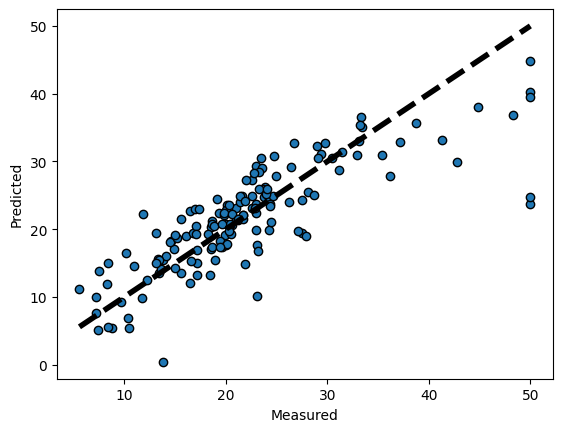

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')

#### 새로운 모형 생성 - 회귀나무모형

In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6835179161458892

In [17]:
# 정해진 형식으로 예측결과를 저장
output = pd.DataFrame({'house_id': range(X_test.shape[0]), 'house_price': y_pred.flatten()})
output.to_csv('submission.csv', index=False)

<font color='tomato'><font color="#CC3D3D"><p>
# End